In [1]:
#Population density, digitalization, purchasing power, education
#http://www.beta.inegi.org.mx/programas/intercensal/2015/default.html#Microdatos
#Our focus will be individuals with education higher than highschool.  
#Nivel 2:Preparatoria o bachillerato (general o tecnológico) y normal básica.
#Nivel 3:Preparatoria terminada, profesional (licenciatura, normal superior o equivalente), especialidad, maestría o doctorado.



In [6]:
#import my dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [7]:
# Import our data into pandas from CSV
EducationDf = './educacion.xlsx'
EducationDf = pd.read_excel(EducationDf)
EducationDf.head()

,Entidad federativa,Población de 15 años y más,Sin escolaridad,Educación básica total,Secundaria,Educación media superior2,Educación superior3,Grado promedio de escolaridad
0,01 Aguascalientes,922260,3.078416,54.283066,57.491646,21.845141,20.670093,9.725975
1,02 Baja California,2426598,2.961389,51.934395,59.341918,25.462602,19.384175,9.757418
2,03 Baja California Sur,522043,3.262950,48.039721,56.765475,27.366328,21.051714,9.905535
3,04 Campeche,654054,7.592951,51.673715,53.955038,20.279518,20.309485,9.138454
4,05 Coahuila de Zaragoza,2126205,2.512034,54.099816,60.009841,21.443746,21.505499,9.897388


In [8]:
#Summary of df
EducationDf.describe()

,Población de 15 años y más,Sin escolaridad,Educación básica total,Secundaria,Educación media superior2,Educación superior3,Grado promedio de escolaridad
count,3.200000e+01,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,2.709138e+06,5.737728,53.986825,52.950475,21.457249,18.417866,9.145188
std,2.332535e+06,3.131656,4.505664,6.181105,2.954784,4.114649,0.821018
min,5.220430e+05,2.020905,38.892506,39.320231,16.095182,11.585514,7.288581
25%,1.206256e+06,3.523586,51.869225,50.888035,19.696501,16.248990,8.693992
50%,2.098236e+06,4.774336,54.040417,54.005715,21.437596,18.638018,9.288556
75%,3.309756e+06,6.939761,56.724633,57.397342,23.226445,20.765498,9.589753
max,1.188276e+07,14.553113,63.476607,62.903990,27.366328,32.137140,11.119587


In [9]:
#Data types -*shouldnt they be all int
EducationDf.dtypes

Entidad federativa                object
Población de 15 años y más         int64
Sin escolaridad                  float64
Educación básica total           float64
Secundaria                       float64
Educación media superior2        float64
Educación superior3              float64
Grado promedio de escolaridad    float64
dtype: object

In [10]:
#DF shape
EducationDf.shape

(32, 8)

In [32]:
#All states in DF
EducationDf["Entidad federativa"].unique()

array(['01 Aguascalientes', '02 Baja California',
       '03 Baja California Sur', '04 Campeche', '05 Coahuila de Zaragoza',
       '06 Colima', '07 Chiapas', '08 Chihuahua', '09 Ciudad de México',
       '10 Durango', '11 Guanajuato', '12 Guerrero', '13 Hidalgo',
       '14 Jalisco', '15 México', '16 Michoacán de Ocampo', '17 Morelos',
       '18 Nayarit', '19 Nuevo León', '20 Oaxaca', '21 Puebla',
       '22 Querétaro', '23 Quintana Roo', '24 San Luis Potosí',
       '25 Sinaloa', '26 Sonora', '27 Tabasco', '28 Tamaulipas',
       '29 Tlaxcala', '30 Veracruz de Ignacio de la Llave', '31 Yucatán',
       '32 Zacatecas'], dtype=object)

In [34]:
# Finding how many students each trainer has - como se busca por estado?

EducationDf["Entidad federativa"].sum["Sin escolaridad"]

TypeError: 'method' object is not subscriptable

In [13]:
# Calculate the min/max no scolarity per state?????
minsin_escolaridad = EducationDf["Sin escolaridad"].min()
maxsin_escolaridad = EducationDf["Sin escolaridad"].max()


# Place all of the data found into a summary DataFrame
summary_table= pd.DataFrame({"Min Sin escolaridad":[minsin_escolaridad],"Max Sin Escolaridad":[maxsin_escolaridad]})
summary_table

,Min Sin escolaridad,Max Sin Escolaridad
0,2.020905,14.553113


In [14]:
#Calculate the total education levels for the entire dataset
total_education = EducationDf["Sin escolaridad"].sum() + EducationDf["Educación básica total"].sum(
) + EducationDf["Secundaria"].sum() + EducationDf["Educación media superior2"].sum() + EducationDf["Grado promedio de escolaridad"].sum()

# Place all of the data found into a summary DataFrame
summary_table= pd.DataFrame({"Total":[total_education]})
summary_table

,Total
0,4584.8789


In [35]:
EducationDf.head()

,Entidad federativa,Población de 15 años y más,Sin escolaridad,Educación básica total,Secundaria,Educación media superior2,Educación superior3,Grado promedio de escolaridad
0,01 Aguascalientes,922260,3.078416,54.283066,57.491646,21.845141,20.670093,9.725975
1,02 Baja California,2426598,2.961389,51.934395,59.341918,25.462602,19.384175,9.757418
2,03 Baja California Sur,522043,3.262950,48.039721,56.765475,27.366328,21.051714,9.905535
3,04 Campeche,654054,7.592951,51.673715,53.955038,20.279518,20.309485,9.138454
4,05 Coahuila de Zaragoza,2126205,2.512034,54.099816,60.009841,21.443746,21.505499,9.897388


In [36]:
#Top 8 States by Highschool
topStates = EducationDf.nlargest(8, "Secundaria")["Entidad federativa"]

In [39]:
#Top 8 states results for Highschool
topStates.tolist()

['19 Nuevo León',
 '26 Sonora',
 '23 Quintana Roo',
 '05 Coahuila de Zaragoza',
 '09 Ciudad de México',
 '02 Baja California',
 '15 México',
 '01 Aguascalientes']

In [46]:
#Top 8 for all the Dataframe

EducationDf=EducationDf.loc[EducationDf["Entidad federativa"].isin(topStates.tolist()),:]
EducationDf

,Entidad federativa,Población de 15 años y más,Sin escolaridad,Educación básica total,Secundaria,Educación media superior2,Educación superior3,Grado promedio de escolaridad
0,01 Aguascalientes,922260,3.078416,54.283066,57.491646,21.845141,20.670093,9.725975
1,02 Baja California,2426598,2.961389,51.934395,59.341918,25.462602,19.384175,9.757418
4,05 Coahuila de Zaragoza,2126205,2.512034,54.099816,60.009841,21.443746,21.505499,9.897388
8,09 Ciudad de México,7128836,2.020905,38.892506,59.829697,26.623140,32.137140,11.119587
14,15 México,11882755,3.995530,52.887163,57.694768,24.986933,17.854740,9.528067
18,19 Nuevo León,3786162,2.150119,50.449585,62.903990,22.838405,24.172711,10.274956
22,23 Quintana Roo,1090216,4.486634,50.910920,60.031457,25.785257,18.615485,9.615036
25,26 Sonora,2070267,2.718490,49.820289,60.840032,24.761251,21.936253,10.001429


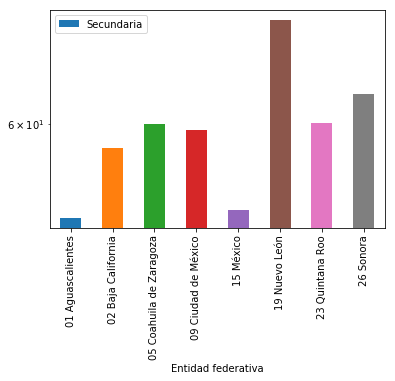

In [56]:
# State and Highschool completion

EducationDf.plot(x="Entidad federativa", y="Secundaria", kind="bar", logy = True)

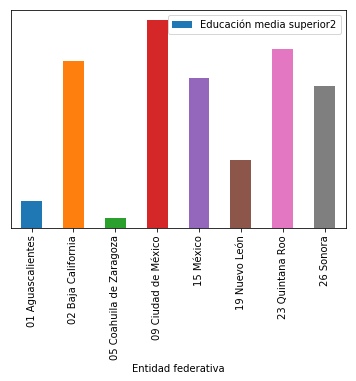

In [57]:
# State and College completion
EducationDf.plot(x="Entidad federativa", y="Educación media superior2", kind="bar", logy = True)



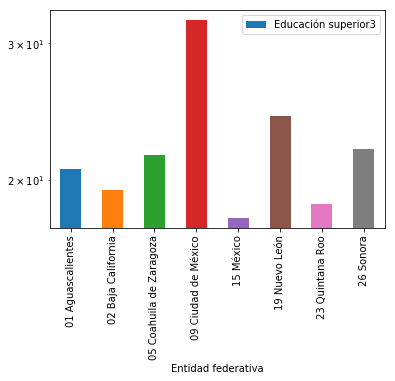

In [62]:
# State and Above college completion
EducationDf.plot(x="Entidad federativa", y="Educación superior3", kind="bar", logy = True)

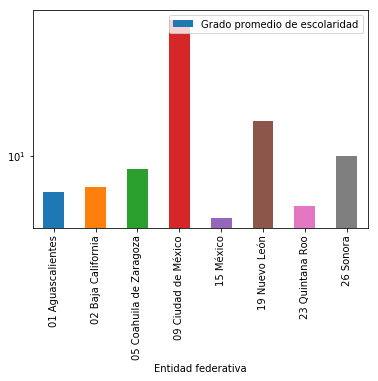

In [63]:
# State and Avg Scolarity Grade completion
EducationDf.plot(x="Entidad federativa", y="Grado promedio de escolaridad", kind="bar", logy = True)

Text(0.5, 0.98, 'Categorical Plotting')

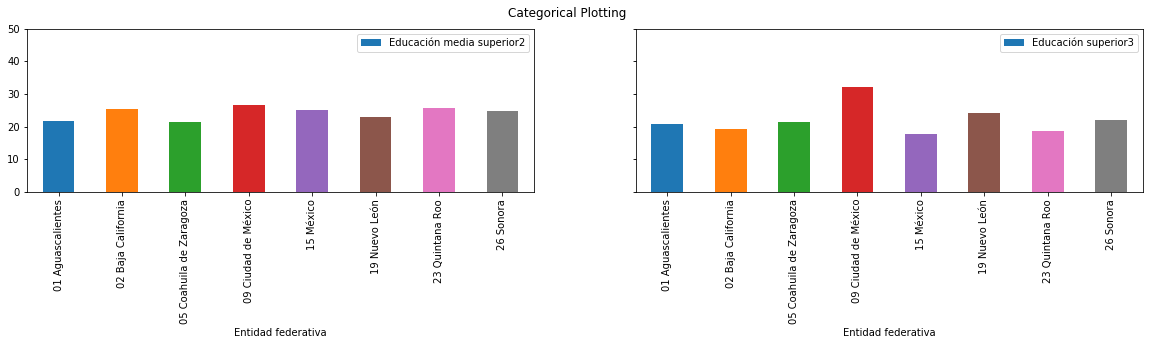

In [134]:
fig, (axs1,axs2) = plt.subplots(1, 2, figsize=(20, 3), sharey=True)



# State and Above college completion
EducationDf.plot(x="Entidad federativa", y="Educación media superior2", kind="bar",  ax=axs1)
EducationDf.plot(x="Entidad federativa", y="Educación superior3", kind="bar", ax=axs2)

axs1.set_ylim(0, 50)
axs2.set_ylim(0, 50)

fig.suptitle('Categorical Plotting')


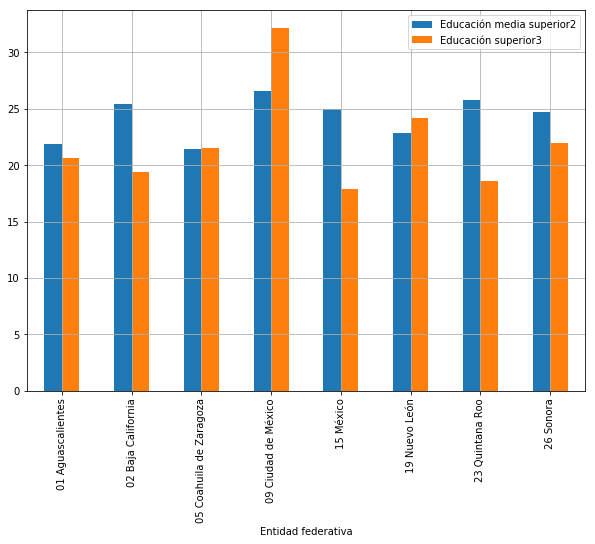

In [141]:
EducationDf.loc[:,["Entidad federativa","Educación media superior2", "Educación superior3"]].set_index("Entidad federativa").plot.bar(stacked=False, figsize=(10,7), grid=True)

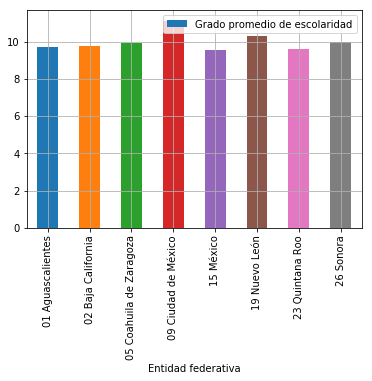

In [144]:
EducationDf.plot(x="Entidad federativa", y="Grado promedio de escolaridad", kind="bar",grid=True)

In [116]:
#trying the traspose and all graphs in one
# x = EducationDf.set_index("Entidad federativa").T.}reset_index()
# x.head()
EducationDf.head()

,Entidad federativa,Población de 15 años y más,Sin escolaridad,Educación básica total,Secundaria,Educación media superior2,Educación superior3,Grado promedio de escolaridad
0,01 Aguascalientes,922260,3.078416,54.283066,57.491646,21.845141,20.670093,9.725975
1,02 Baja California,2426598,2.961389,51.934395,59.341918,25.462602,19.384175,9.757418
4,05 Coahuila de Zaragoza,2126205,2.512034,54.099816,60.009841,21.443746,21.505499,9.897388
8,09 Ciudad de México,7128836,2.020905,38.892506,59.829697,26.623140,32.137140,11.119587
14,15 México,11882755,3.995530,52.887163,57.694768,24.986933,17.854740,9.528067


In [119]:
#All states data only for Educacion Media superior 2 y 3 
final=EducationDf.loc[:,["Entidad federativa","Educación media superior2","Educación superior3","Grado promedio de escolaridad"]]
final.head()

,Entidad federativa,Educación media superior2,Educación superior3,Grado promedio de escolaridad
0,01 Aguascalientes,21.845141,20.670093,9.725975
1,02 Baja California,25.462602,19.384175,9.757418
4,05 Coahuila de Zaragoza,21.443746,21.505499,9.897388
8,09 Ciudad de México,26.623140,32.137140,11.119587
14,15 México,24.986933,17.854740,9.528067


In [122]:
#Save to CSV
final.to_csv('/Archivo.csv')

[0. 0. 0. 0. 0. 0. 0. 0.]
01 Aguascalientes
[0.0, 57.4916455433243, 21.8451412833691]


ValueError: Invalid broadcasting comparison [(0, '01 Aguascalientes')] with block values

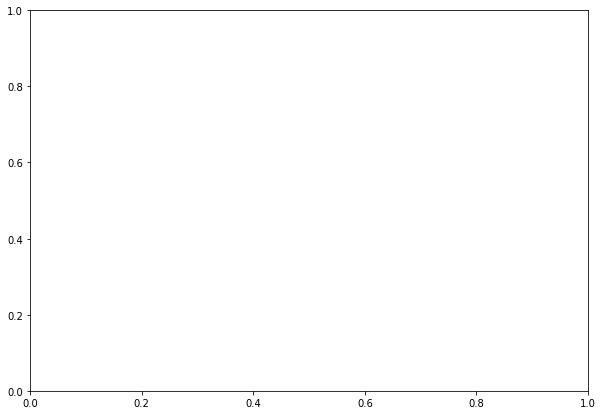

In [123]:
fig, ax = plt.subplots(figsize=(10,7))
statesList = EducationDf["Entidad federativa"]

# level = EducationDf['Index'].drop_duplicates()
margin_bottom = np.zeros(len(EducationDf['Secundaria']))
print(margin_bottom)
# colors = ["#006D2C", "#31A354","#74C476"]

# EducationDf.loc[EducationDf["Entidad federativa"]=="01 Aguascalientes", :]
for state in enumerate(statesList):
    print(state[1])
    values = EducationDf.loc[EducationDf["Entidad federativa"]==state[1], ["Secundaria", "Educación media superior2"]]
#     values  = EducationDf.loc[[EducationDf["Entidad federativa"]==state[1]],: ]
#     values = list(values)
    values = values.reset_index()
    values = values.T[0].tolist()
    print(values)
#     margin_bottom += values
#     print(type(values.T))
    EducationDf[EducationDf==state].plot.bar(x='')
#     df[df['Entidad federativa'] == state].plot.bar(x='Year',y='Value', ax=ax, stacked=True, 
#                                     bottom = margin_bottom#, color=colors[num], label=state
#                                                   )
     

plt.show()


In [15]:
# Set x axis and tick locations
x_axis = np.arange(len(EducationDf))
tick_locations = [value for value in x_axis]

<BarContainer object of 32 artists>

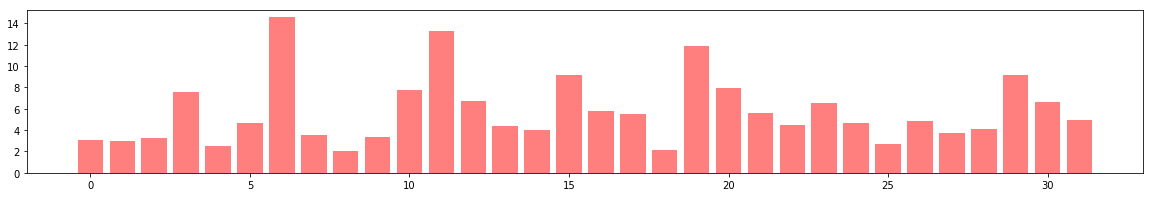

In [16]:
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.bar(x_axis, EducationDf["Sin escolaridad"], color='r', alpha=0.5, align="center")


([<matplotlib.axis.XTick at 0x2678ede4b00>,
 <a list of 8 Text xticklabel objects>)

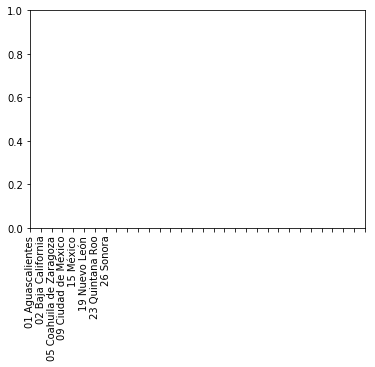

In [142]:
plt.xticks(tick_locations, EducationDf["Entidad federativa"], rotation="vertical")

Text(0, 0.5, 'Average No Scolarity')

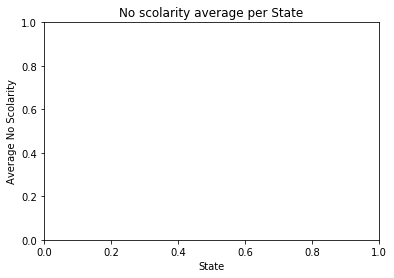

In [19]:
# Set a Title and labels
plt.title("No scolarity average per State")
plt.xlabel("State")
plt.ylabel("Average No Scolarity")

In [20]:
#CHART DATA FRAME --- No Scolarity Per State 
# Filter the DataFrame down only to those columns to chart
state_and_no_scolarity = educacion_1[["Entidad federativa","Sin escolaridad"]]

# Set the index to be "State" so they will be used as labels
state_and_no_scolarity = state_and_no_scolarity.set_index("Entidad federativa")
state_and_no_scolarity.head()

NameError: name 'educacion_1' is not defined

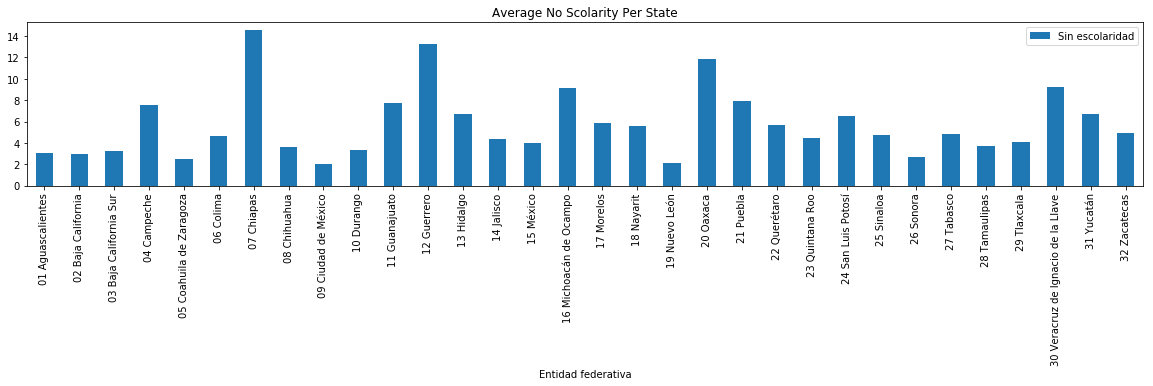

<Figure size 432x288 with 0 Axes>

In [78]:
# Use DataFrame.plot() in order to create a bar chart of the data
state_and_no_scolarity.plot(kind="bar", figsize=(20,3))

# Set a title for the chart
plt.title("Average No Scolarity Per State")

plt.show()
plt.tight_layout()

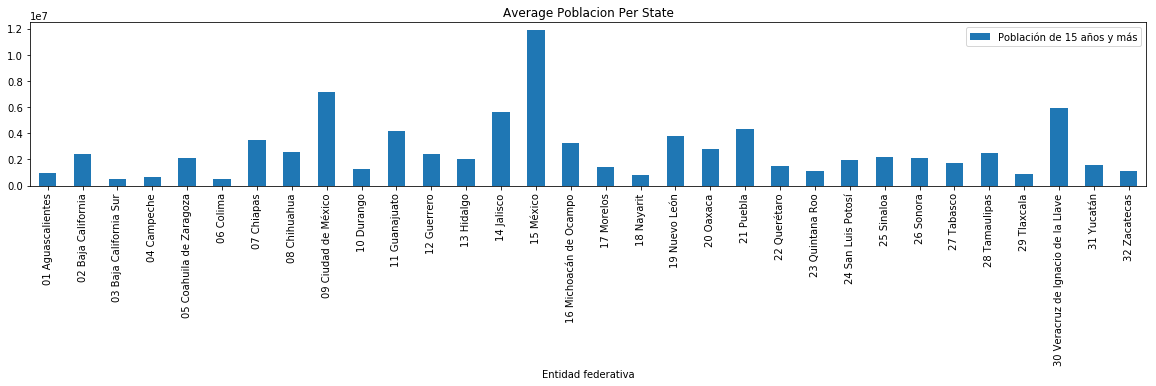

<Figure size 432x288 with 0 Axes>

In [21]:
#CHART DATA FRAME --- Population Per State 
#Summary of df
EducationDf.describe()

# Filter the DataFrame down only to those columns to chart
state_and_poblacion = EducationDf[["Entidad federativa","Población de 15 años y más"]]

# Set the index to be "State" so they will be used as labels
state_and_poblacion = state_and_poblacion.set_index("Entidad federativa")
state_and_poblacion.head()

# Use DataFrame.plot() in order to create a bar chart of the data
state_and_poblacion.plot(kind="bar", figsize=(20,3))

# Set a title for the chart
plt.title("Average Poblacion Per State")

plt.show()
plt.tight_layout()

In [22]:
EducationDf.describe()

,Población de 15 años y más,Sin escolaridad,Educación básica total,Secundaria,Educación media superior2,Educación superior3,Grado promedio de escolaridad
count,3.200000e+01,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,2.709138e+06,5.737728,53.986825,52.950475,21.457249,18.417866,9.145188
std,2.332535e+06,3.131656,4.505664,6.181105,2.954784,4.114649,0.821018
min,5.220430e+05,2.020905,38.892506,39.320231,16.095182,11.585514,7.288581
25%,1.206256e+06,3.523586,51.869225,50.888035,19.696501,16.248990,8.693992
50%,2.098236e+06,4.774336,54.040417,54.005715,21.437596,18.638018,9.288556
75%,3.309756e+06,6.939761,56.724633,57.397342,23.226445,20.765498,9.589753
max,1.188276e+07,14.553113,63.476607,62.903990,27.366328,32.137140,11.119587


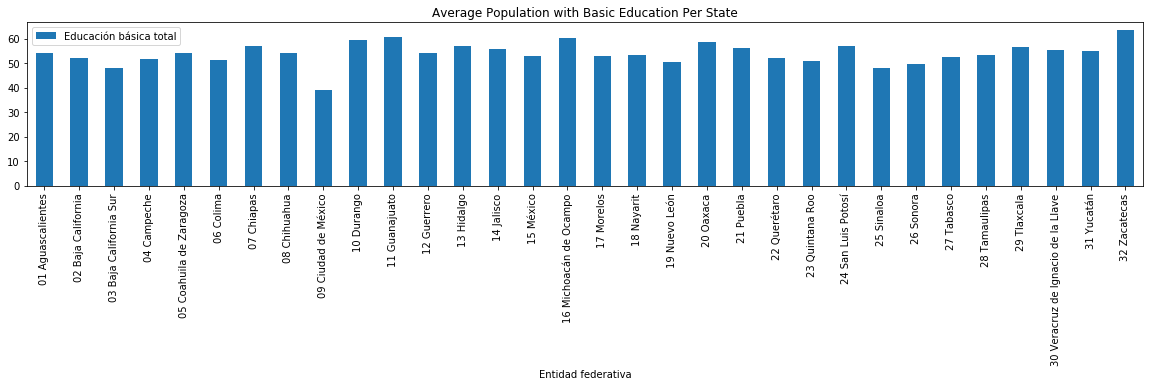

<Figure size 432x288 with 0 Axes>

In [23]:
#CHART DATA FRAME --- Basic Education Per State 
#Summary of df
EducationDf.describe()

# Filter the DataFrame down only to those columns to chart
state_and_educacionbasica = EducationDf[["Entidad federativa","Educación básica total"]]

# Set the index to be "State" so they will be used as labels
state_and_educacionbasica = state_and_educacionbasica.set_index("Entidad federativa")
state_and_educacionbasica.head()

# Use DataFrame.plot() in order to create a bar chart of the data
state_and_educacionbasica.plot(kind="bar", figsize=(20,3))

# Set a title for the chart
plt.title("Average Population with Basic Education Per State")

plt.show()
plt.tight_layout()

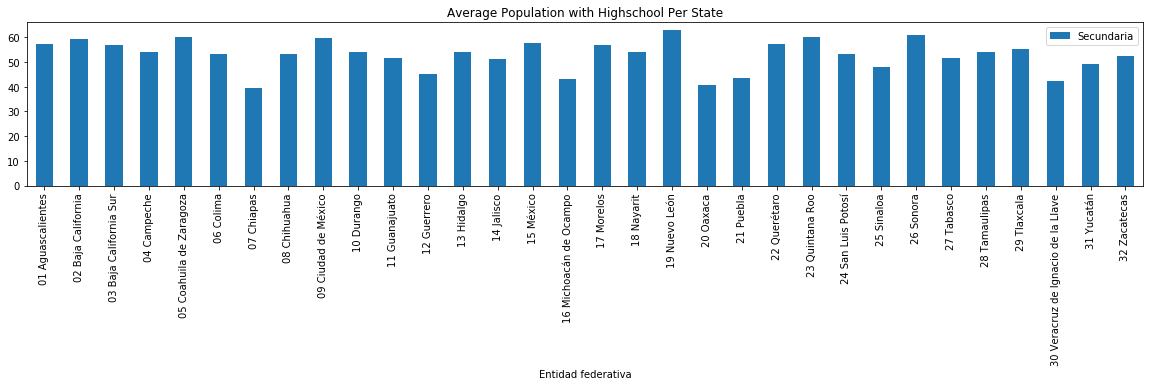

<Figure size 432x288 with 0 Axes>

In [24]:
#CHART DATA FRAME --- Population with Highschool Per State 

# Filter the DataFrame down only to those columns to chart
state_and_secundaria = EducationDf[["Entidad federativa","Secundaria"]]

# Set the index to be "State" so they will be used as labels
state_and_secundaria = state_and_secundaria.set_index("Entidad federativa")
state_and_secundaria.head()

# Use DataFrame.plot() in order to create a bar chart of the data
state_and_secundaria.plot(kind="bar", figsize=(20,3))

# Set a title for the chart
plt.title("Average Population with Highschool Per State")

plt.show()
plt.tight_layout()

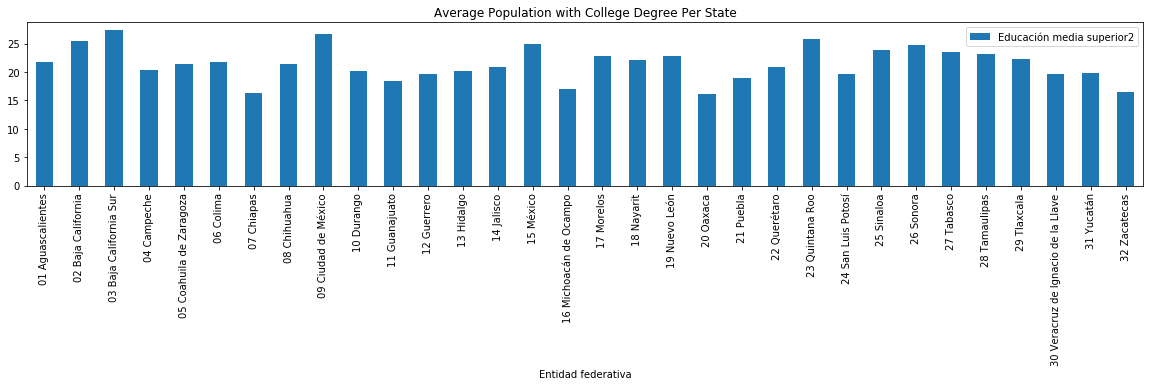

<Figure size 432x288 with 0 Axes>

In [25]:
#CHART DATA FRAME --- Population with College Per State 

# Filter the DataFrame down only to those columns to chart
state_and_superior = EducationDf[["Entidad federativa","Educación media superior2"]]

# Set the index to be "State" so they will be used as labels
state_and_superior = state_and_superior.set_index("Entidad federativa")
state_and_superior.head()

# Use DataFrame.plot() in order to create a bar chart of the data
state_and_superior.plot(kind="bar", figsize=(20,3))

# Set a title for the chart
plt.title("Average Population with College Degree Per State")

plt.show()
plt.tight_layout()

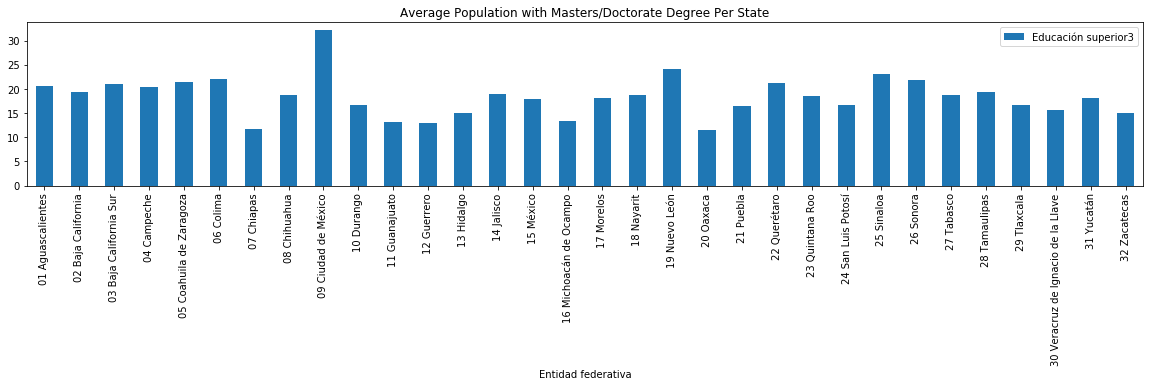

<Figure size 432x288 with 0 Axes>

In [90]:
#CHART DATA FRAME --- Population with Doctorate Per State 

# Filter the DataFrame down only to those columns to chart
state_and_superior3 = educacion_1[["Entidad federativa","Educación superior3"]]

# Set the index to be "State" so they will be used as labels
state_and_superior3 = state_and_superior3.set_index("Entidad federativa")
state_and_superior3.head()

# Use DataFrame.plot() in order to create a bar chart of the data
state_and_superior3.plot(kind="bar", figsize=(20,3))

# Set a title for the chart
plt.title("Average Population with Masters/Doctorate Degree Per State")

plt.show()
plt.tight_layout()

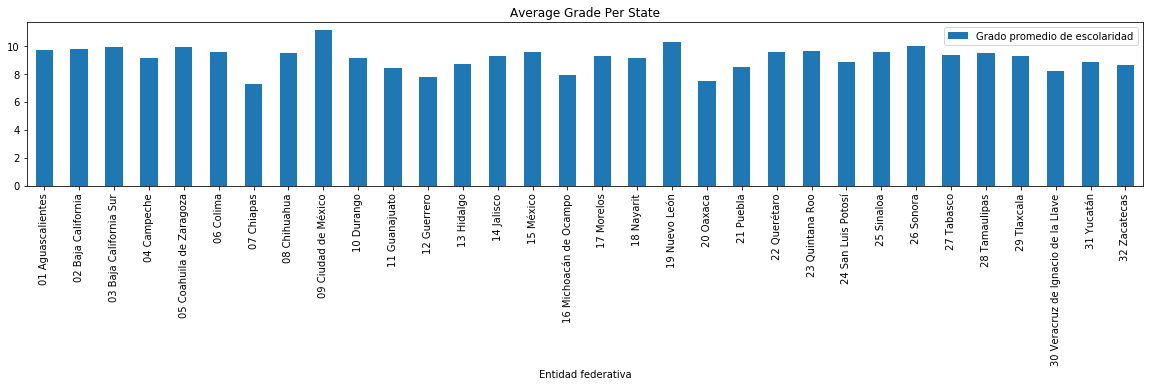

<Figure size 432x288 with 0 Axes>

In [26]:
#CHART DATA FRAME --- Average Grade Per State 

# Filter the DataFrame down only to those columns to chart
state_and_avg_grade = EducationDf[["Entidad federativa","Grado promedio de escolaridad"]]

# Set the index to be "State" so they will be used as labels
state_and_avg_grade = state_and_avg_grade.set_index("Entidad federativa")
state_and_avg_grade.head()

# Use DataFrame.plot() in order to create a bar chart of the data
state_and_avg_grade.plot(kind="bar", figsize=(20,3))

# Set a title for the chart
plt.title("Average Grade Per State")

plt.show()
plt.tight_layout()